In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read Dataset

In [2]:
df = pd.read_csv('./dataset/loan_train.csv')
df.head()
     

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [3]:
#Checking the data types of columns
df.dtypes
     

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [4]:

#let’s have a look if the data has missing values or not:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [5]:
#let’s have a look at the descriptive statistics of the dataset before filling in the missing values:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [6]:
#Now let’s fill in the missing values. In categorical columns, we can fill in missing values with the mode of each column.
#The mode represents the value that appears most often in the column and is an appropriate choice when dealing with categorical data
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [7]:
# Fill missing values in numerical column
#We can fill in the missing values of the loan amount column with the median value.
#The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data.
# df['Loan_Amount'].fillna(df['Loan_Amount'].median(), inplace=True)

#We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use
df['Term'].fillna(df['Term'].mode()[0], inplace=True)

#We can fill in the missing values of the credit history column with the mode value.
#Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [8]:
df.isnull().sum() 

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## Data Exploration and Visualization

### Distribution of the loan status

In [9]:
 

fig_loan_status = px.histogram(df, x='Status', title='Loan Status Distribution')
fig_loan_status.show()

### Distribution of Gender

In [10]:
fig_gender=px.histogram(df,x='Gender',title='Gender Distribution',color_discrete_sequence = ['darkseagreen'])
fig_gender.show()

### Distribution of the Martial Status

In [11]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,
                     x=married_count.index,
                     y=married_count.values,
                     title='Marital Status Distribution')
fig_married.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_married.show()

### Distribution of the Self-employment

In [12]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='Self-Employment Distribution')
fig_self_employed.update_traces(marker_color = 'navy',
                  marker_line_width = 2, opacity = 1)
fig_self_employed.show()
     

### Education Distribution

In [13]:
fig_education=px.histogram(df,x='Education',title='Education Distribution',color_discrete_sequence = ['darkseagreen'])

fig_education.show()

### Distribution of the Applicant Income

In [14]:
fig_applicant_income = px.histogram(df, x='Applicant_Income',
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

### Distribution of Coapplicant Income

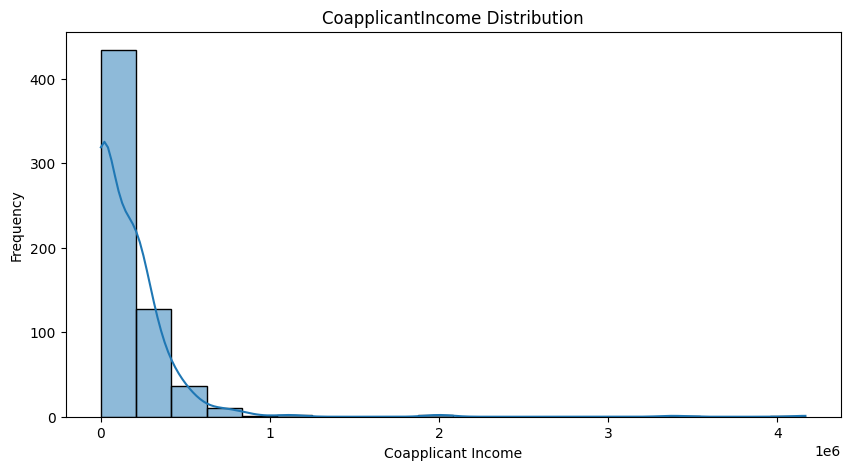

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='Coapplicant_Income', bins=20, kde=True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('CoapplicantIncome Distribution')
plt.show()

### Loan Amount Distribution

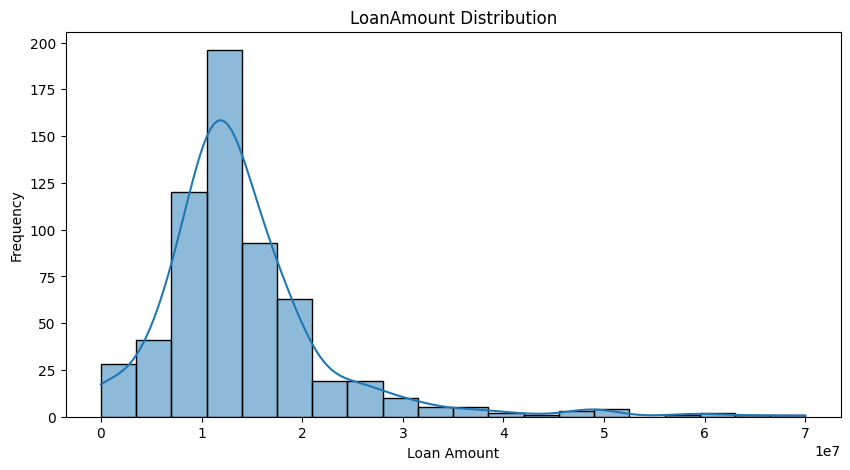

In [16]:
df['Loan_Amount'] = pd.to_numeric(df['Loan_Amount'], errors='coerce')
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Loan_Amount', bins=20, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()
     

### Applicant Income vs.Loan Amount

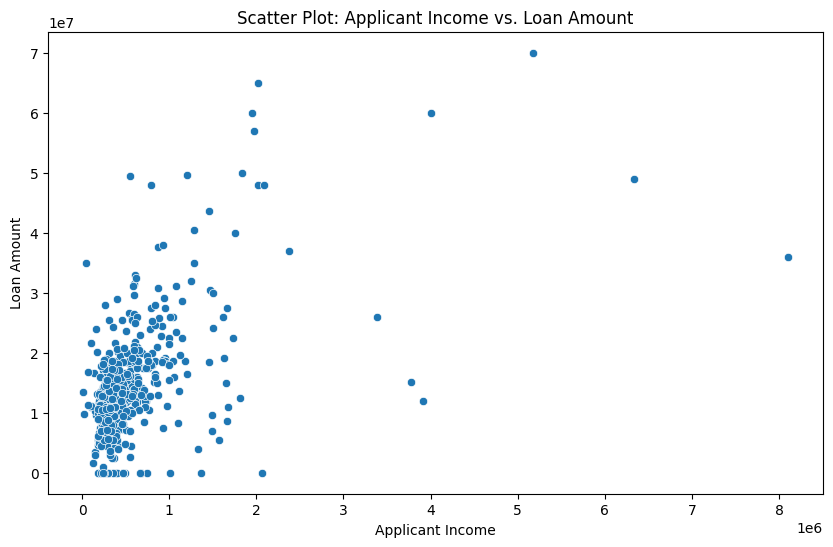

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Applicant_Income', y='Loan_Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.show()


### Married vs. Applicant Income

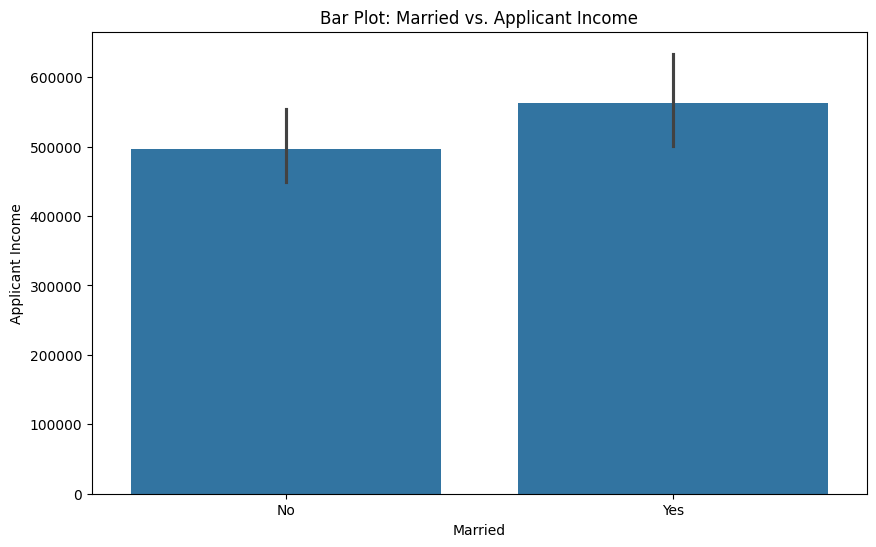

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Married', y='Applicant_Income')
plt.xlabel('Married')
plt.ylabel('Applicant Income')
plt.title('Bar Plot: Married vs. Applicant Income')
plt.show()

### Applicant Income vs. Education

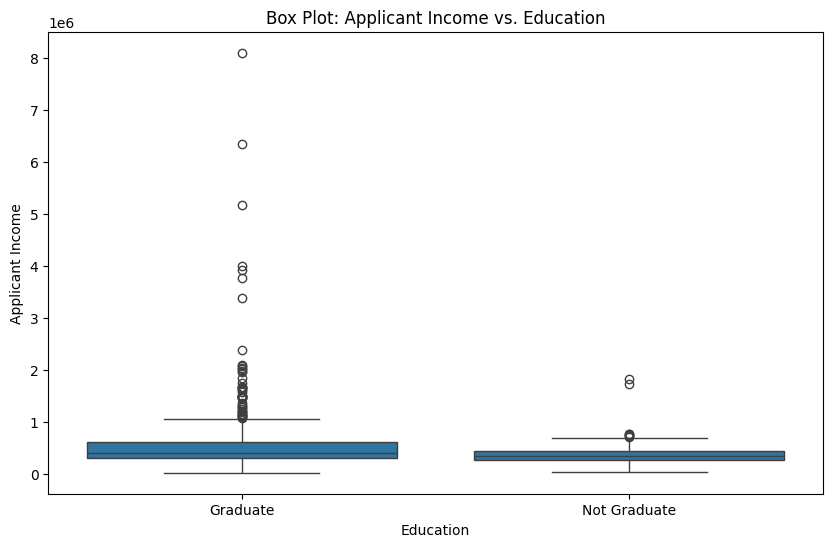

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Applicant_Income')
plt.ylabel('Applicant Income')
plt.xlabel('Education')
plt.title('Box Plot: Applicant Income vs. Education')
plt.show()

### Credit History vs. Loan Status

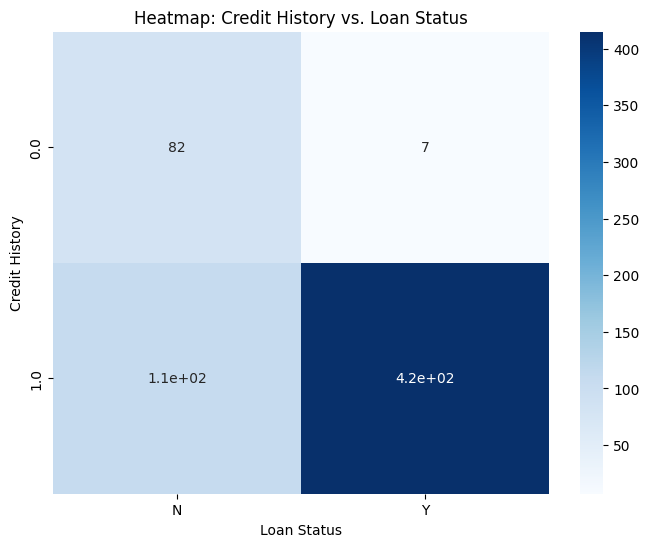

In [20]:
df['Credit_History'] = pd.to_numeric(df['Credit_History'], errors='coerce')
cross_tab = pd.crosstab(df['Credit_History'], df['Status'])
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()

### Loan_Status vs Property_Area

In [21]:

fig_property_area = px.histogram(df, x='Area', color='Status',
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()
     

### Pair Plots by Loan Status

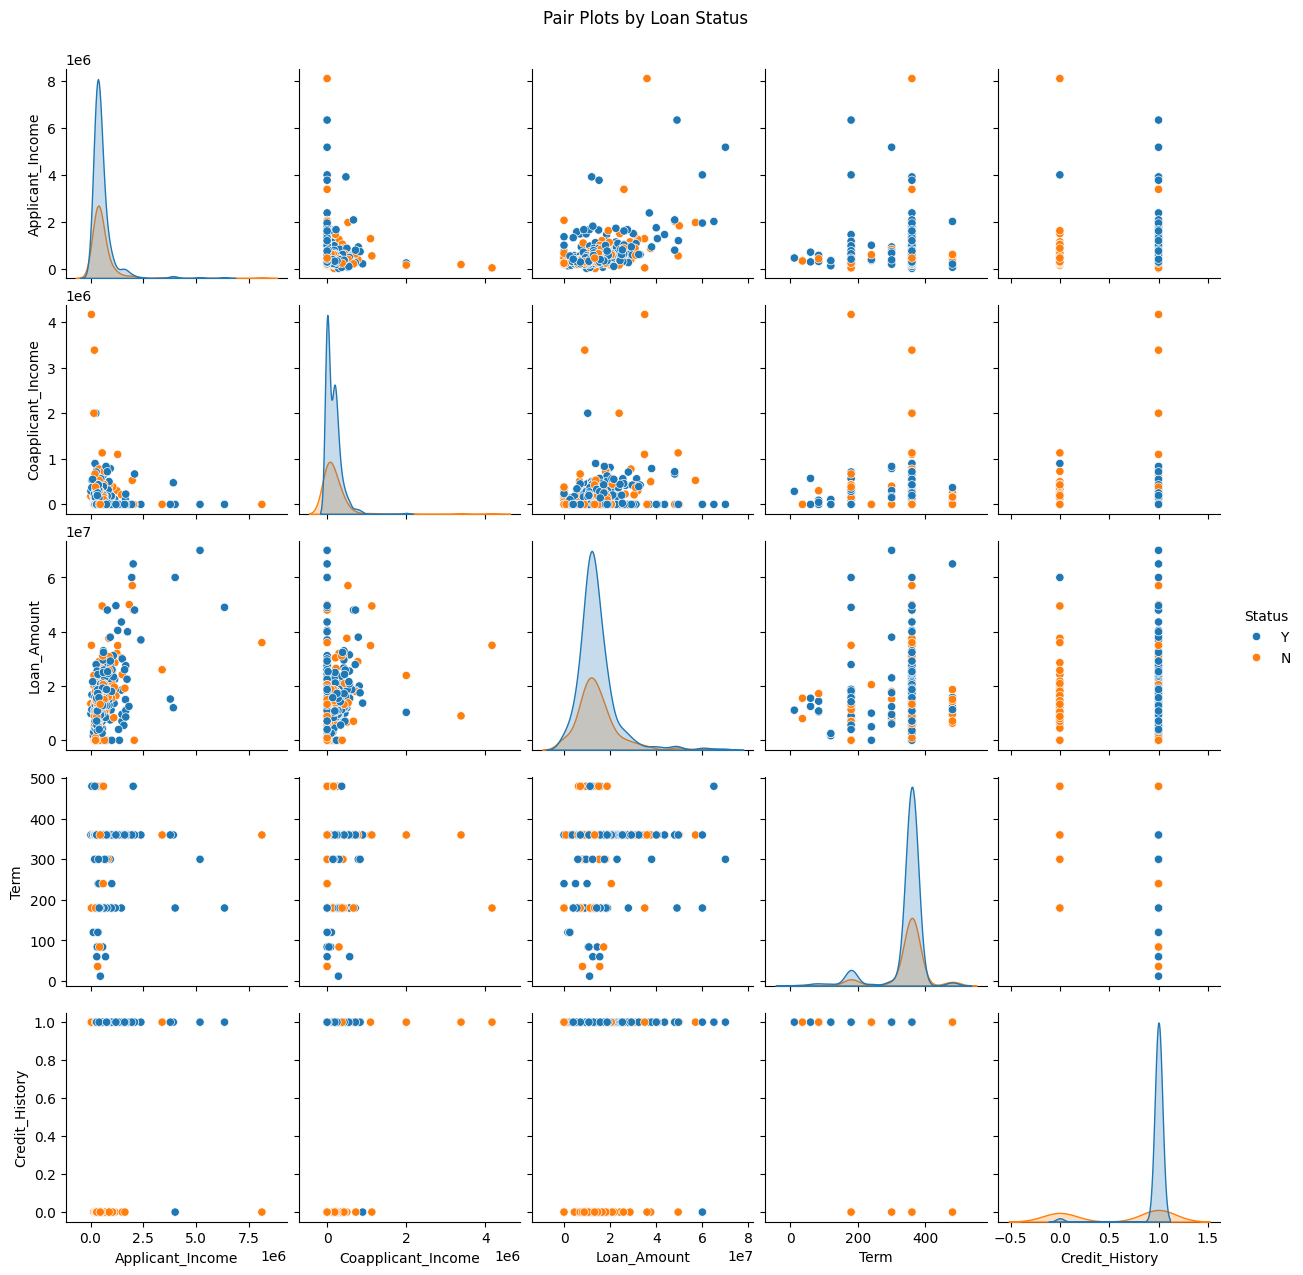

In [22]:
sns.pairplot(df, hue='Status')
plt.suptitle('Pair Plots by Loan Status', y=1.02)
plt.show()

### Detecting outliers and removing them


In [23]:
fig_income = px.box(df, x='Status',
                    y='Applicant_Income',
                    color="Status",
                    title='Loan_Status vs Applicant_Income')
fig_income.show()

In [24]:
# The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:

# Calculate the IQR
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Applicant_Income'] >= lower_bound) & (df['Applicant_Income'] <= upper_bound)]

In [25]:

fig_coapplicant_income = px.box(df,
                                x='Status',
                                y='Coapplicant_Income',
                                color="Status",
                                title='Loan_Status vs Coapplicant_Income')
fig_coapplicant_income.show()

In [26]:
# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:


# Calculate the IQR

Q1 = df['Coapplicant_Income'].quantile(0.25)

Q3 = df['Coapplicant_Income'].quantile(0.75)

IQR = Q3 - Q1

# Define the lower and upper bounds for outliers

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR


# Remove outliers

df = df[(df['Coapplicant_Income'] >= lower_bound) & (df['Coapplicant_Income'])]

### Relationship between the Property Area and the Loan Status

In [27]:
fig_property_area = px.histogram(df, x='Area', color='Status',

                                 barmode='group',

                                title='Loan_Status vs Property_Area')

fig_property_area.show()

### Relationship between Credit History and Loan Status

In [28]:

#Now let’s have a look at the relationship between credit history and loan status:


fig_credit_history = px.histogram(df, x='Credit_History', color='Status',

                                  barmode='group',

                                  title='Loan_Status vs Credit_His')

fig_credit_history.show()

In [29]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y


# Data Preparation

In [30]:
#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area','Status']
for i in col_to_encode:
    df[i] = le.fit_transform(df[i])

df.head()
     

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
5,1,1,2,0,1,541700,419600.0,26700000,360.0,1.0,2,1
6,1,1,0,1,0,233300,151600.0,9500000,360.0,1.0,2,1
7,1,1,3,0,0,303600,250400.0,15800000,360.0,0.0,1,0


In [35]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term', 'Credit_History']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

In [36]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
1,1,1,1,0,0,0.608614,-0.402801,-0.171007,0.259251,0.406808,0,0
3,1,1,0,1,0,-0.611545,-0.153896,-0.293824,0.259251,0.406808,2,1
5,1,1,2,0,1,1.117421,0.384325,1.962938,0.259251,0.406808,2,1
6,1,1,0,1,0,-0.764065,-0.400458,-0.677627,0.259251,0.406808,2,1
7,1,1,3,0,0,-0.335179,-0.111142,0.289557,0.259251,-2.458161,1,0


In [37]:
# Split the dataset into features (X) and target (y)
X = df.drop('Status', axis=1)
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building and Evaluation

In [38]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("\n")

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_report_svc = classification_report(y_test, y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC:")
print("Accuracy: ", accuracy_svc)
print("\nClassification Report: ", classification_report_svc)
print("\nConfusion Matrix: \n", confusion_matrix_svc)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", classification_rep_xgb)
print("Confusion Matrix:\n", confusion_mat_xgb)



Logistic Regression:
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.56      0.70        27
           1       0.86      0.99      0.92        73

    accuracy                           0.87       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.88      0.87      0.86       100

Confusion Matrix:
 [[15 12]
 [ 1 72]]



Random Forest Classifier:
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.86      0.95      0.90        73

    accuracy                           0.85       100
   macro avg       0.83      0.77      0.79       100
weighted avg       0.85      0.85      0.84       100

Confusion Matrix:
 [[16 11]
 [ 4 69]]



SVC:
Accuracy:  0.85

Classification Report:                precision    recall  f1-score   support

           0       0.93      0.48    

# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_reg_grid = GridSearchCV(log_reg_model, param_grid=log_reg_params, cv=3)

log_reg_grid.fit(X_train, y_train)

log_reg_best = log_reg_grid.best_estimator_

y_pred_log_reg = log_reg_best.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression:")
print(f"Best parameters: {log_reg_grid.best_params_}")
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_}")
print(f"Accuracy: {accuracy_log_reg}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression:
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8354978354978355
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        27
           1       0.85      0.99      0.91        73

    accuracy                           0.86       100
   macro avg       0.89      0.75      0.79       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix:
[[14 13]
 [ 1 72]]


In [40]:
import joblib

# Save the best Logistic Regression model
joblib.dump(log_reg_best, 'logistic_regression_model.pkl')


print("Models saved successfully!")

Models saved successfully!
